<a href="https://colab.research.google.com/github/MKeshav04/House-price-prediction/blob/main/HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model


In [ ]:
df = pd.read_csv("/content/house-prices.csv")
df

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54
...,...,...
995,3442,434336.51
996,1530,211400.14
997,2102,172513.03
998,1551,200701.84


In [ ]:
# df["price"] = df["price"].astype(int)
# df

In [ ]:
df.dtypes

,0
area,int64
price,float64


Text(0, 0.5, 'Prices (in USD)')

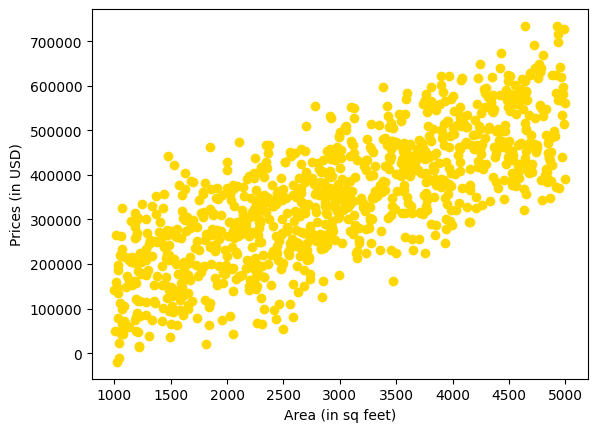

In [ ]:
plt.scatter(df["area"], df["price"], color = "gold")
plt.xlabel("Area (in sq feet)")
plt.ylabel("Prices (in USD)")

In [ ]:

# By looking at the scatter plot we get an idea that the distribution is suitable for the linear regression model and hence we will go ahead and use the linear regression model.

In [ ]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(df[["area"]], df["price"])

LinearRegression()

In [ ]:
df2 = pd.DataFrame({"area" : df["area"]})
df2

,area
0,1567
1,3345
2,3722
3,2783
4,2949
...,...
995,3442
996,1530
997,2102
998,1551


In [ ]:
predicted_arr = reg_obj.predict(df2)

print(predicted_arr[:10], end=", ")
print("...", end=", ")
print(predicted_arr[-10:])

[212322.90487091 384074.21961441 420491.68061458 329786.12125342
 345821.39585827 405712.18052698 266417.80715232 360600.89594587
 484342.98491461 276657.19936988], ..., [378857.92546585 212709.29703006 416724.35706284 393251.0333943
 468597.50442913 393444.22947387 208748.77739874 264002.85615762
 210777.33623429 470915.85738405]


In [ ]:
m = reg_obj.coef_
m

array([96.59803979])

In [ ]:

c = reg_obj.intercept_ # outputs the value of intercept(c)
c

60953.77652271959

In [ ]:
x = df2.to_numpy(df["area"])

In [ ]:
# y = mx + c

using_formula_arr = np.empty(1000)
for i in range(len(x)):
  using_formula_arr[i] = m * x[i] + c
  # print(m * x[i] + c , end =", ")

print(using_formula_arr[:10], end = ", ")
print("...", end = ", ")
print(using_formula_arr[-10:])

[212322.90487091 384074.21961441 420491.68061458 329786.12125342
 345821.39585827 405712.18052698 266417.80715232 360600.89594587
 484342.98491461 276657.19936988], ..., [378857.92546585 212709.29703006 416724.35706284 393251.0333943
 468597.50442913 393444.22947387 208748.77739874 264002.85615762
 210777.33623429 470915.85738405]


<ipython-input-14-c26d7942fe79>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  using_formula_arr[i] = m * x[i] + c


In [ ]:
np.array_equal(predicted_arr, using_formula_arr)

True

In [ ]:

df["predicted_price"] = predicted_arr
display(df)

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


Text(0, 0.5, 'Prices (in USD)')

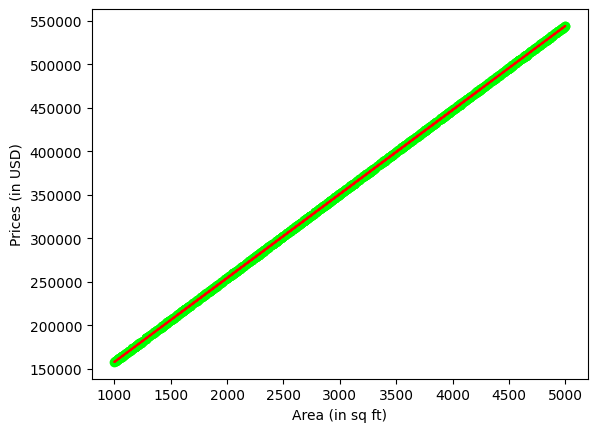

In [ ]:
plt.plot(df["area"], df["predicted_price"], color = "red")
plt.scatter(df["area"], df["predicted_price"], color = "lime")

plt.xlabel("Area (in sq ft)")
plt.ylabel("Prices (in USD)")

Text(0, 0.5, 'Price (in $)')

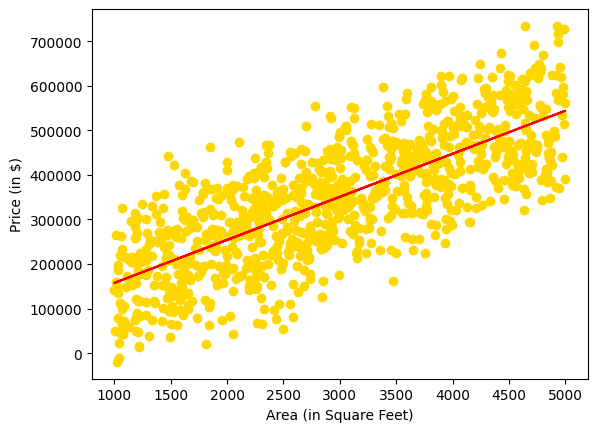

In [ ]:

plt.scatter(df["area"], df["price"], color="gold")
plt.plot(df["area"], df["predicted_price"], color="red")

plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [ ]:

display(df)
print(df.dtypes)

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


area                 int64
price              float64
predicted_price    float64
dtype: object
